# Verfahren nach Hammer und Hollingsworth

## Butcher-Tableu - 2-stufiges RK Verfahren

Das Verfahren nach Hammer und Hollingsworth ist durch das folgende Butcher-Tableau gegeben:

$$\begin{array}{c|cc}
c & A\\\hline
& b^T
\end{array} = 
\begin{array}{c|cc}
	\frac{3-\sqrt{3}}{6} & \frac{1}{4} & \frac{1}{4}-\frac{1}{6}\sqrt{3}  \\
	\frac{3+\sqrt{3}}{6} & \frac{1}{4}+\frac{1}{6}\sqrt{3}  & \frac{1}{4} \\\hline
	     & \frac{1}{2} & \frac{1}{2}
\end{array}$$

Das Verfahren wird in der Literatur auch als implizit Runge-Kutta-Gauss Verfahren bezeichnet. Das Verfahren basiert auf der Gauss-Quadratur. Für $m=1$ folgt auf dem Intervall $[-1,1]$ für die Knoten $\xi_{1,2}=\mp\sqrt{3}/3$ (vgl. Jupyter-Notebook Quadratur-Formeln). Auf das Intervall $[0,1]$ bezogen, erhalten wir
$$\xi_{1,2}=\frac{1}{2}+\mp\frac{\sqrt{3}}{2\cdot 3} = \frac{3\mp \sqrt{3}}{6}.$$

Damit folgt:

\begin{equation*}\begin{array}{c|cc|l|l}
m & b & \xi & \text{Verfahren} & \text{Konsistenzordnung}\\\hline
m=0 & b_1 = 1 & \xi_1 = \frac{1}{2} & \text{implizite Mittelpunkt-Regel}&2\\
m=1 & b_1 = b_2 = \frac{1}{2} &\xi_1 = \frac{3- \sqrt{3}}{6},\ \xi_1 = \frac{3+ \sqrt{3}}{6} & \text{implizit Hammer-Hollingsworth Verfahren}&4\\
\end{array}\end{equation*}

Die Gewichte der $A$ Matrix des Butcher-Tableaus ergeben sich durch Integration der Lagrange Interpolationspolynome 1. Ordnung definiert durch die Stützstellen $\xi_1,\xi_2$ auf den Intervalle $[0,\xi_1], [0,\xi_2]$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import init_printing
init_printing()

In [2]:
xi = [(3-sp.sqrt(3))/6,(3+sp.sqrt(3))/6]
id2 = np.eye(2)
s = sp.symbols('s')
basispolynome=[(s-xi[1])/(xi[0]-xi[1]), (s-xi[0])/(xi[1]-xi[0])]

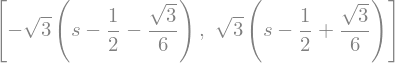

In [3]:
basispolynome

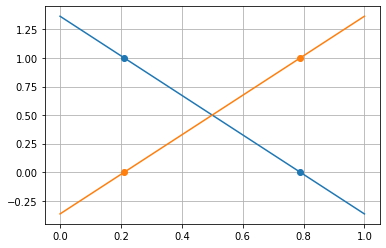

In [4]:
xp = np.linspace(0,1,10)
for b,c in zip(basispolynome,['tab:blue','tab:orange']):
    plt.plot(xp,sp.lambdify(s,b)(xp),c=c)
    plt.plot(xi,sp.lambdify(s,b)(np.array(xi)),'o',c=c)
plt.grid()

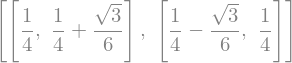

In [5]:
[[sp.simplify(sp.integrate(b,(s,0,xii))) for xii in xi] for b in basispolynome]

In der **Stufenform**
$$\begin{split}
k_1 & = y_k + h\, (a_{1 1} f(x_k+c_1\,h,	 k_1) + a_{1 2} f(x_k+c_2\,h,	 k_2))\\
k_2 & = y_k + h\, (a_{2 1} f(x_k+c_1\,h,	 k_1) + a_{2 2} f(x_k+c_2\,h,	 k_2))\\
y_{k+1} & = y_k + h\, (b_1 f(x_k+c_1\,h,	 k_1) + b_2 f(x_k+c_2\,h, k_2))
\end{split}$$

folgt für das Verfahren

$$\begin{split}
k_1 & = y_k + h\, \left(\frac{1}{4}\cdot f\left(x_k+\frac{3-\sqrt{3}}{6}\,h,	 k_1\right) + \frac{3-2\sqrt{3}}{12}\cdot f\left(x_k+\frac{3+\sqrt{3}}{6}\,h,	 k_2\right)\right)\\
k_2 & = y_k + h\, \left(\frac{3+2\sqrt{3}}{12}\cdot f\left(x_k+\frac{3-\sqrt{3}}{6}\,h,	 k_1\right) + \frac{1}{4}\cdot f\left(x_k+\frac{3+\sqrt{3}}{6}\,h,	 k_2\right)\right)\\
y_{k+1} & = y_k + \frac{1}{2}\cdot h\, \left( f\left(x_k+\frac{3-\sqrt{3}}{6}\,h,	 k_1\right) + f\left(x_k+\frac{3+\sqrt{3}}{6}\,h, k_2\right)\right)
\end{split}$$

In der **Steigungsform** (auch Standardform)
$$\begin{split}
r_1 & = f\big(x_k+ c_1 h, y_k + h\, (a_{1,1}\, r_1 + a_{1,2}\, r_2)\big)\\
r_2 & = f\big(x_k+ c_2 h, y_k + h\, (a_{2,1}\, r_1 + a_{2,2}\, r_2)\big)\\
y_{k+1} & = y_{k} + h\, (b_1\, r_1 + b_2\, r_2).
\end{split}$$

folgt für das Verfahren

$$\begin{split}
r_1 & = f\big(x_k+ \frac{3-\sqrt{3}}{6} h, y_k + h\, (\frac{1}{4}\, r_1 + \big(\frac{1}{4}-\frac{1}{6}\sqrt{3}\big)\, r_2)\big)\\
r_2 & = f\big(x_k+ \frac{3+\sqrt{3}}{6} h, y_k + h\, (\big(\frac{1}{4}+\frac{1}{6}\sqrt{3}\big)\, r_1 + \frac{1}{4}\, r_2)\big)\\
y_{k+1} & = y_{k} + \frac{h}{2}\, (r_1 + r_2).
\end{split}$$

**Bemerkung:** Bei diesem Verfahren wird der numerische Vorteil der **Steigungsform** gut sichtbar. In der Stufenform werden 4 Funktionsauswertungen $f(x,y)$ für die Stufen $k_{1,2}$ und zwei für die Integration benötigt. In der Steigungsform sind es gerade die zwei Steigungen, daher 2 versus 6!

## Umsetzung der Steigungsform

In [6]:
from scipy.linalg import lu, solve_triangular

Wir berechnen mit Hilfe des Hammer-Hollingsworth Verfahren Lösungen für $x\in [0,1]$ des Anfangswertproblems 

$$y'(x) = -4 y(x)\qquad y(0) = 1.$$

Die analytische Lösung ist gegeben durch $y_a(x) = e^{-4x}$.

In [7]:
def f(x,y):
    return -4.*y
def df(x,y):
    return -4.

In [8]:
def ya(x):
    return np.exp(-4*x)

In jedem Zeitschritt müssen wir das (nichtlineare) Gleichungssystem

\begin{equation}\begin{split}
r_1 & = f\big(x_k+ \frac{3-\sqrt{3}}{6} h, y_k + h\, (\frac{1}{4}\, r_1 + \big(\frac{1}{4}-\frac{1}{6}\sqrt{3}\big)\, r_2)\big)\\
r_2 & = f\big(x_k+ \frac{3+\sqrt{3}}{6} h, y_k + h\, (\big(\frac{1}{4}+\frac{1}{6}\sqrt{3}\big)\, r_1 + \frac{1}{4}\, r_2)\big)
\end{split}\end{equation}

für die Steigungen $r_1, r_2$ berechnen. Dadurch, dass die beiden Steigungen in beiden Gleichungen vorkommen, müssen wir ein nichtlineares Gleichungs**system** lösen, was das Verfahren insbesondere für Differentialgleichungssysteme numerisch teuer macht.

Für die generische Funktion $G(r)$ für das Newton-Verfahren folgt
\begin{equation}G(r) = \begin{pmatrix}
r_1 - f\big(x_k+ \frac{3-\sqrt{3}}{6} h, y_k + h\, (\frac{1}{4}\, r_1 + \big(\frac{1}{4}-\frac{\sqrt{3}}{6}\big)\, r_2)\big)\\
r_2 - f\big(x_k+ \frac{3+\sqrt{3}}{6} h, y_k + h\, (\big(\frac{1}{4}+\frac{\sqrt{3}}{6}\big)\, r_1 + \frac{1}{4}\, r_2)\big)
\end{pmatrix}.\end{equation}
Die Jacobi-Matrix ist gegeben durch
\begin{equation}G'(r) = \mathbb{1} - h\,\begin{pmatrix}
\frac{1}{4}\partial_y f\big(x_k+ \frac{3-\sqrt{3}}{6} h, y_k + h\, (\frac{1}{4}\, r_1 + \big(\frac{1}{4}-\frac{\sqrt{3}}{6}\big)\, r_2)\big) & \left(\frac{1}{4}-\frac{\sqrt{3}}{6}\right)\partial_y f\big(x_k+ \frac{3-\sqrt{3}}{6} h, y_k + h\, (\frac{1}{4}\, r_1 + \big(\frac{1}{4}-\frac{\sqrt{3}}{6}\big)\, r_2)\big)\\
\left(\frac{1}{4}+\frac{\sqrt{3}}{6}\right)\partial_y f\big(x_k+ \frac{3+\sqrt{3}}{6} h, y_k + h\, (\big(\frac{1}{4}+\frac{\sqrt{3}}{6}\big)\, r_1 + \, r_2) & \frac{1}{4}\partial_y f\big(x_k+ \frac{3+\sqrt{3}}{6} h, y_k + h\, (\big(\frac{1}{4}+\frac{\sqrt{3}}{6}\big)\, r_1 + \, r_2)\big)
\end{pmatrix}.\end{equation}



In [9]:
def implizitHammerHollingsworth(xend, h, y0, f, df):
    x = [0.]
    y = [y0]
    cHH = np.array([(3-np.sqrt(3))/6,(3+np.sqrt(3))/6])
    aHH = np.array([[1/4,(1/4-np.sqrt(3)/6)],[(1/4+np.sqrt(3)/6),1/4]])
    bHH = np.array([0.5,0.5])
    id2 = np.eye(2)
    
    # Verfahrensfunktion für implizit Euler
    def G(r, xk, yk):
        return np.array([r[0]-f(xk+cHH[0]*h, yk+h*(aHH[0,:]@r)),
                         r[1]-f(xk+cHH[1]*h, yk+h*(aHH[1,:]@r))])
    
    # Partielle Ableitung nach s der Verfahrensfunktion
    def dG(r, xk, yk):
        return id2-h*np.array([df(xk+cHH[0], yk+h*(aHH[0,:]@r))*aHH[0,:],
                               df(xk+cHH[1], yk+h*(aHH[1,:]@r))*aHH[1,:]])

    # Newton-Verfahren für Steigung
    def newton(r, xk, yk, tol=1e-12, maxIter=20):
        k = 0
        delta = np.ones_like(r)*10*tol
        while np.linalg.norm(delta,np.inf) > tol and k < maxIter:
            # LR-Zerlegung
            A = dG(r,xk, yk)
            b = G(r,xk,yk)
            P,L,R = lu(A)
            z = solve_triangular(L,P.T@b,lower=True) # Vorwärtseinsetzen
            delta = solve_triangular(R,z,lower=False) # Rückwärtseinsetzen
            r -= delta
            k += 1
        return r
    
    # Zeitloop
    r = np.array([f(x[-1],y[-1]),f(x[-1],y[-1])])
    while x[-1] < xend-h/2:
        r = newton(r,x[-1],y[-1])
        y.append(y[-1]+h*r@bHH)
        x.append(x[-1]+h)
    return np.array(x), np.array(y)

In [10]:
x,y = implizitHammerHollingsworth(1,0.1,1,f,df)

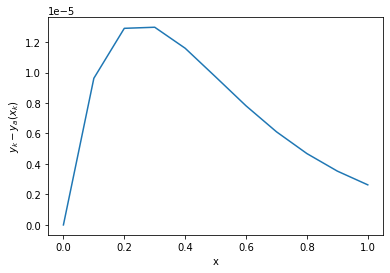

In [11]:
plt.plot(x,y-ya(x))
plt.xlabel('x')
plt.ylabel('$y_k-y_a(x_k)$')
plt.show()

Kontrolle Konvergenzordnung

In [12]:
n = 10**np.linspace(2,5)
hs = 2/n
err = []
for h in hs:
    x, y = implizitHammerHollingsworth(1,h,1,f,df)
    err.append(np.linalg.norm(y-ya(x),np.inf))

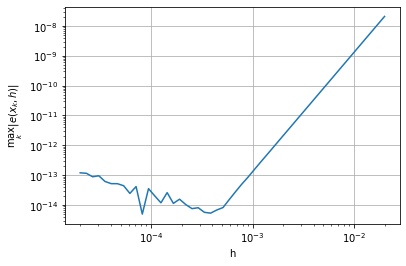

In [13]:
plt.loglog(hs,err,'-')
plt.xlabel('h')
plt.ylabel(r'$\max_k \|e(x_k,h)\|$')
plt.grid()
plt.show()

Um die Konvergenzordnung leicht aus dem Diagram lesen zu können, normieren wir die Schrittweiten und Fehler:

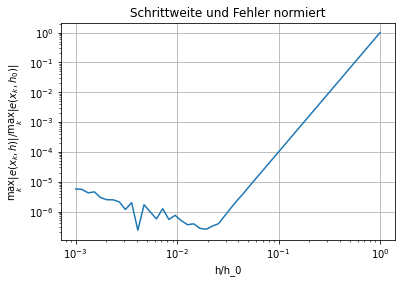

In [14]:
plt.loglog(hs/hs[0],err/err[0],'-')
plt.xlabel('h/h_0')
plt.ylabel(r'$\max_k \|e(x_k,h)\|/\max_k \|e(x_k,h_0)\|$')
plt.grid()
plt.title('Schrittweite und Fehler normiert')
plt.show()